# Sentiment Classification

Data Preprocessing

In [469]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\furka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [470]:
# Load the data and combine them
df_pos = pd.read_csv('data/reviews.pos' , delimiter="\t", header=None,)
df_neg = pd.read_csv('data/reviews.neg', delimiter="\t", header=None)

df_neg['label'] = 'neg'
df_pos['label'] = 'pos'

df_pos = df_pos.sample(frac=0.8).reset_index(drop=True)

df = pd.concat([df_pos, df_neg], ignore_index=True)
df.to_csv('data/combined_reviews.csv', index=False, header=['review', 'label'])

In [471]:
data = pd.read_csv('data/combined_reviews.csv')
data = data.sample(frac=0.6).reset_index(drop=True)

In [472]:
data.head()

,review,label
0,hızlı geldi. kutusu baya büyük. kalitesi bekle...,pos
1,bileklik bana hediye geldi. bileğimde çok şık ...,pos
2,kaliteli bir ürün.almak isteyenler tereddüt et...,pos
3,"ürün konusunda çok takintili bi̇ri̇yi̇mdi̇r, b...",pos
4,"kaliteli ürün , hızlı gönderi ve uygun fiyat..",pos


In [473]:
data['label'].value_counts()

label
pos    105497
neg      8907
Name: count, dtype: int64

In [474]:
# Function to clean the text
# split and print the punctiation, stopwords and the text

punctuation = string.punctuation
stopwords = stopwords.words('turkish')

print(punctuation)
print(stopwords)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']


In [475]:
def clean_from_stopwords(data):
    cleaned_data = []
    for d in data:
        temp = ''
        for word in d.split():
            if word not in stopwords and not word.isnumeric():
                temp += word + ' '
        cleaned_data.append(temp.strip())
    return pd.Series(cleaned_data)

# Clean data from stopwords
data['review'] = clean_from_stopwords(data['review'])

In [476]:
data['review'][0:5]

0    hızlı geldi. kutusu baya büyük. kalitesi bekle...
1    bileklik bana hediye geldi. bileğimde şık durd...
2    kaliteli bir ürün.almak isteyenler tereddüt et...
3    ürün konusunda takintili bi̇ri̇yi̇mdi̇r, bi̇r ...
4          kaliteli ürün , hızlı gönderi uygun fiyat..
Name: review, dtype: object

In [477]:
# Function to clean the text from punctuation
def clean_data_from_punctuation(data):
    cleaned_data = []
    for d in data:
        temp = ''
        for word in d:
            if word not in punctuation:
                temp += word
        cleaned_data.append(temp)
    return pd.Series(cleaned_data)

# Clean data from punctuation
data['review'] = clean_data_from_punctuation(data['review'])

In [478]:
data['review'][0:5]

0    hızlı geldi kutusu baya büyük kalitesi bekledi...
1    bileklik bana hediye geldi bileğimde şık durdu...
2    kaliteli bir ürünalmak isteyenler tereddüt etm...
3    ürün konusunda takintili bi̇ri̇yi̇mdi̇r bi̇r ü...
4             kaliteli ürün  hızlı gönderi uygun fiyat
Name: review, dtype: object

In [479]:
# save the cleaned data
data.to_csv('data/cleaned_reviews.csv', index=False)
data = pd.read_csv('data/cleaned_reviews.csv',sep=',',names=['review', 'label'])
print(data.head())

                                              review  label
0                                             review  label
1  hızlı geldi kutusu baya büyük kalitesi bekledi...    pos
2  bileklik bana hediye geldi bileğimde şık durdu...    pos
3  kaliteli bir ürünalmak isteyenler tereddüt etm...    pos
4  ürün konusunda takintili bi̇ri̇yi̇mdi̇r bi̇r ü...    pos


Modeling

In [480]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data['review'].values.astype('U'),
    data['label'].values.astype('U'),
    test_size=0.3, random_state=42)

print(x_train.shape, x_test.shape)

(80083,) (34322,)


In [481]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(x_train)
print(X_train_count.shape)

(80083, 144358)


In [482]:
# TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
print(X_train_tfidf.shape)

(80083, 144358)


In [483]:
# Naive Bayes Classifier for Multinomial Models
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)
X_test_count = count_vectorizer.transform(x_test)
X_test_tfidf = tfidf_transformer.transform(X_test_count)

In [493]:
# Predict the sentiment of the test data
y_pred = clf.predict(X_test_tfidf)
for review, sentiment in zip(x_test[:25], y_pred[:25]):
    print('%r => %s' % (review, sentiment))

'merhabadefne koz çay bardağı güzel  alış verişi estetik bardak yaptım teşekkürler' => pos
'ürünü geçen yil aldim hi̇ç i̇şi̇mi̇ görmeden di̇rek çöpe attim açiklamalarda yazildiği gi̇bi̇ deği̇l kesi̇nli̇kle kapiya uymuyor uydurmak zor boşuna paranizi çöpe atmayin' => pos
'rahat takılıyor güzel bir ürün' => pos
'samsung s7 edge bir sıkıntı yok' => pos
'ürün siparişten iki gün sonra geldiherşeyiyle süper bir ürünkolay montaj ediliyor güven veriyordışarıda 4050 vermektense direk alın' => pos
'ürün kaliteli kullanışlı yerden tasarruf ediyorsunuz dolaplarınız düzenli görünüyor tereddüt etmeden alabileceğiniz bir ürün kutu aldım iki adedinde çatlaklar çıktı sanırım kargodan kaynaklı bir problem onları şekilde kullanıyorum teşekkürler ' => pos
'görünümü kavrayışı rahatlığı herşeyi güzel' => pos
'hızı gayet iyi günümüz telefonları yararlı bir ürün tavsiye ederim' => pos
'ürün elime ulaşır ulaşmaz kullanmaya başladım' => pos
'henüz kullanmaya başlamadım inceledim gördüğüm kadarıyla gayet güzel k

Model Evaluation

In [494]:
# Results
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.9204009090379348


Confusion Matrix: [[    0  2732]
 [    0 31590]]


              precision    recall  f1-score   support

         neg       0.00      0.00      0.00      2732
         pos       0.92      1.00      0.96     31590

    accuracy                           0.92     34322
   macro avg       0.46      0.50      0.48     34322
weighted avg       0.85      0.92      0.88     34322



C:\Users\furka\.conda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\furka\.conda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\furka\.conda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


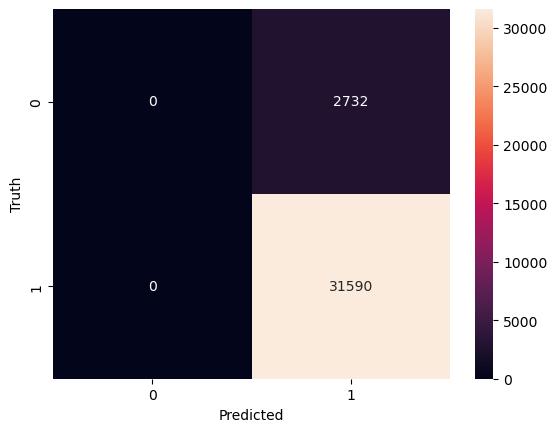

In [497]:
# Graph of results
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [498]:
# Save the model
import joblib
joblib.dump(clf, 'model/sentiment_classification_model.pkl')
joblib.dump(count_vectorizer, 'model/count_vectorizer.pkl')
joblib.dump(tfidf_transformer, 'model/tfidf_transformer.pkl')

['model/tfidf_transformer.pkl']